In [ ]:
""" 
# Exploratory Data Analysis
1. Distribution of Male and Female 
 - Bar Chart
 - Pie Chart
2. What Distribution of size of all Images
 - Histogram
 - Box Plot
 - Split by “Gender”
3. Make the decision of width & height to resize using above chart.
4. Remove the few images that are having very less size

In [1]:
import numpy as np
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

# computer vison lib
import cv2

#glob
from glob import glob

In [3]:
# extarct path of male and feamle in crop data  and put it in the list

femalpath = glob('./crop_data/female/*.jpg')
malepath = glob('./crop_data/male/*.jpg')

In [6]:
df_female = pd.DataFrame(femalpath,columns=['filepath'])
df_female['gender'] = 'female'

df_male = pd.DataFrame(malepath,columns=['filepath'])
df_male['gender'] = 'male'

#concatinating the dataframes 
df = pd.concat((df_female,df_male),axis=0)

In [7]:
df.head()

,filepath,gender
0,./crop_data/female\female_0.jpg,female
1,./crop_data/female\female_1.jpg,female
2,./crop_data/female\female_100.jpg,female
3,./crop_data/female\female_1002.jpg,female
4,./crop_data/female\female_1005.jpg,female


In [8]:
df.tail()

,filepath,gender
2170,./crop_data/male\male_994.jpg,male
2171,./crop_data/male\male_996.jpg,male
2172,./crop_data/male\male_997.jpg,male
2173,./crop_data/male\male_998.jpg,male
2174,./crop_data/male\male_999.jpg,male


In [9]:
df.shape

(4761, 2)

In [10]:
# it will take each image path
# then return width of the image
def get_size(path):
    img = cv2.imread(path)
    return img.shape[0]

In [11]:
# store dimension of image in this columns
# addding colum to the data
df['dimension'] = df['filepath'].apply(get_size) 

In [12]:
df.head()

,filepath,gender,dimension
0,./crop_data/female\female_0.jpg,female,273
1,./crop_data/female\female_1.jpg,female,182
2,./crop_data/female\female_100.jpg,female,122
3,./crop_data/female\female_1002.jpg,female,122
4,./crop_data/female\female_1005.jpg,female,182


In [13]:
dist_gender = df['gender'].value_counts()
dist_gender

gender
female    2586
male      2175
Name: count, dtype: int64

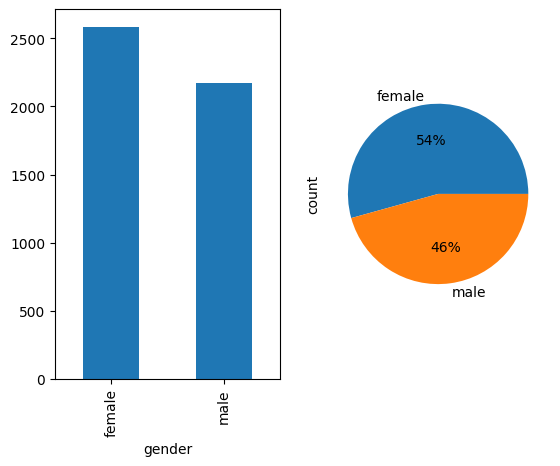

In [14]:
fig,ax = plt.subplots(nrows=1,ncols=2)
dist_gender.plot(kind='bar',ax=ax[0])
dist_gender.plot(kind='pie',ax=ax[1],autopct='%0.0f%%')
plt.show()

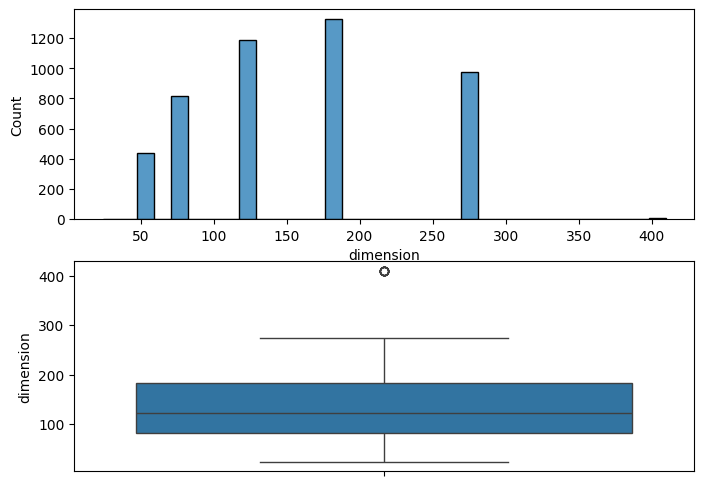

In [21]:
# What Distribution of size of all Images
# Histogram
# Box Plot
# Split by “Gender”
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
sns.histplot(df['dimension'])
plt.subplot(2,1,2)
sns.boxplot(df['dimension'])
plt.show()

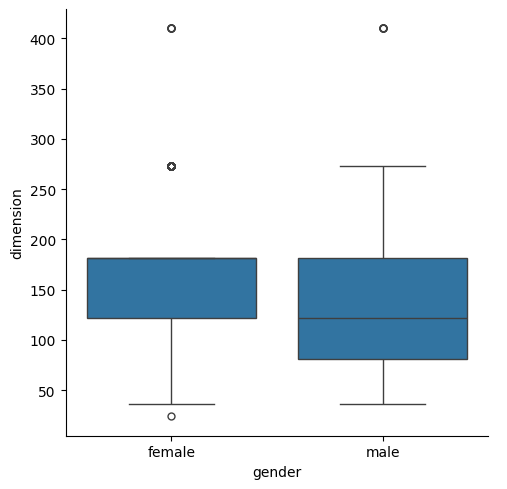

In [16]:
sns.catplot(data=df,x='gender',y='dimension',kind='box')

In [23]:
"""
------conclussion
1. We have almost equal distrbution of gender (numbers)
2. Most of the images are having dimension more than 60
3. Female most of the female images are HD compare to male images

---
- **Consider the image with dimensions more than 60**
- **Resize all the the image into 100 x 100**
"""

'\n------conclussion\n1. We have almost equal distrbution of gender (numbers)\n2. Most of the images are having dimension more than 60\n3. Female most of the female images are HD compare to male images\n\n---\n- **Consider the image with dimensions more than 60**\n- **Resize all the the image into 100 x 100**\n'

In [24]:
#filtering data
df_filter = df.query('dimension > 60')
df_filter.shape

(4319, 3)

In [25]:
df_filter['gender'].value_counts(normalize=True)

gender
female    0.552674
male      0.447326
Name: proportion, dtype: float64

In [ ]:
# structureing the images 100 x 100
""" step-1: read images
    step-2: convert to gray scale
    step-3: resizing to 100*100
    step-4: Flatten image(1x10,000)
"""

In [26]:
def structuring(path):
    try:

        # step - 1: read image
        img = cv2.imread(path) # BGR
        # step - 2: convert into grayscale
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # step -3: resize into 100 x 100 array   

        size = gray.shape[0]
        if size >= 100:
            # cv2.INTER_AREA (SHINK)
            gray_resize = cv2.resize(gray,(100,100),cv2.INTER_AREA)
        else:
            # cv2.INTER_CUBIC (ENLARGE)
            gray_resize = cv2.resize(gray,(100,100),cv2.INTER_CUBIC)

        # step -4: Flatten Image (1x10,000)
        flatten_image = gray_resize.flatten()
        return flatten_image
    
    except:
        return None

In [27]:
df_filter['data'] = df_filter['filepath'].apply(structuring) # convert all images into 100 x 100
df_filter.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5028\2640501514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['data'] = df_filter['filepath'].apply(structuring) # convert all images into 100 x 100


,filepath,gender,dimension,data
0,./crop_data/female\female_0.jpg,female,273,"[200, 189, 188, 181, 184, 185, 179, 176, 189, ..."
1,./crop_data/female\female_1.jpg,female,182,"[31, 25, 35, 25, 31, 29, 30, 31, 34, 34, 49, 7..."
2,./crop_data/female\female_100.jpg,female,122,"[49, 49, 35, 34, 42, 40, 35, 39, 71, 62, 46, 4..."
3,./crop_data/female\female_1002.jpg,female,122,"[137, 128, 114, 96, 96, 95, 93, 114, 150, 163,..."
4,./crop_data/female\female_1005.jpg,female,182,"[234, 236, 231, 231, 231, 185, 142, 111, 52, 4..."


In [28]:
data = df_filter['data'].apply(pd.Series)
data.columns = [f"pixel_{i}" for i in data.columns]
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,200,189,188,181,184,185,179,176,189,180,...,109,106,108,111,113,115,120,117,118,122
1,31,25,35,25,31,29,30,31,34,34,...,45,27,22,30,22,35,20,35,65,19
2,49,49,35,34,42,40,35,39,71,62,...,210,230,231,237,238,230,220,212,210,208
3,137,128,114,96,96,95,93,114,150,163,...,66,53,68,67,74,92,97,103,102,96
4,234,236,231,231,231,185,142,111,52,45,...,241,240,236,237,239,237,237,242,241,241


In [31]:
# Data Normaization 
# since for 8 bit image max value is 255 
# therefore we are dividing each and every pixel with 255

data = data/255.0
data['gender'] = df_filter['gender']
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.003076,0.002907,0.002891,0.002784,0.002830,0.002845,0.002753,0.002707,0.002907,0.002768,...,0.001630,0.001661,0.001707,0.001738,0.001769,0.001845,0.001799,0.001815,0.001876,female
1,0.000477,0.000384,0.000538,0.000384,0.000477,0.000446,0.000461,0.000477,0.000523,0.000523,...,0.000415,0.000338,0.000461,0.000338,0.000538,0.000308,0.000538,0.001000,0.000292,female
2,0.000754,0.000754,0.000538,0.000523,0.000646,0.000615,0.000538,0.000600,0.001092,0.000953,...,0.003537,0.003552,0.003645,0.003660,0.003537,0.003383,0.003260,0.003230,0.003199,female
3,0.002107,0.001968,0.001753,0.001476,0.001476,0.001461,0.001430,0.001753,0.002307,0.002507,...,0.000815,0.001046,0.001030,0.001138,0.001415,0.001492,0.001584,0.001569,0.001476,female
4,0.003599,0.003629,0.003552,0.003552,0.003552,0.002845,0.002184,0.001707,0.000800,0.000692,...,0.003691,0.003629,0.003645,0.003676,0.003645,0.003645,0.003722,0.003706,0.003706,female


In [32]:
 # checking the missing values / null values
data.isnull().sum().sum()

np.int64(0)

In [33]:
## remove the missing values
data.dropna(inplace=True)

In [34]:
data.shape

(4319, 10001)

In [35]:
#saving data using pickel
import pickle

In [36]:
pickle.dump(data,open('./data/data_images_100_100.pickle',mode='wb'))
# wb- mode of operatation is write in byte